In [13]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Logistic Regression

In [14]:
df = pd.read_csv('imbd_log.csv')

In [15]:
df.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,...,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
0,Carmencita,"(5, 6]",1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,...,"Documentary,Short",0.693147,1.386294,5.7,"['\\N', 'DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP']",2.302585,0.0,0.693147,['silent'],0.0
1,Un bon bock,"(5, 6]",1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,...,"Animation,Short",0.000000,0.000000,5.4,"['\\N', 'HU', 'DE', 'FR', 'RO', 'RU', 'JP']",1.386294,0.0,0.693147,['silent'],0.0
2,Chinese Opium Den,"(4, 5]",1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,...,Short,0.000000,0.693147,5.0,"['\\N', 'US', 'DE', 'PT', 'HU', 'RU']",1.609438,0.0,0.693147,['silent'],0.0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,...,"Documentary,Short",0.693147,1.945910,5.4,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",1.945910,0.0,0.693147,['silent'],0.0
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896,1.0,0.000000,9.481588,2.564949,0.0,11,2.833213,...,"Documentary,Short",1.945910,1.791759,7.4,"['\\N', 'HU', 'DE', 'TR', 'FI', 'FR', 'IT', 'E...",3.091042,0.0,1.098612,['silent'],0.0


In [16]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df = numeric_df.drop(['averageRating'], axis=1)
numeric_df.head()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,AwNmExWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,castNumber,companiesNumber,externalLinks,writerCredits,directorsCredits,quotesTotal
0,1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,0.0,0,0,7,2.833213,0.693147,1.386294,2.302585,0.0,0.693147,0.0
1,1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,0.0,0,0,6,0.693147,0.000000,0.000000,1.386294,0.0,0.693147,0.0
2,1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,0.0,0,0,5,0.000000,0.000000,0.693147,1.609438,0.0,0.693147,0.0
3,1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,0.0,0,0,6,3.044522,0.693147,1.945910,1.945910,0.0,0.693147,0.0
4,1896,1.0,0.000000,9.481588,2.564949,0.0,11,2.833213,0.0,0,0,21,4.204693,1.945910,1.791759,3.091042,0.0,1.098612,0.0


In [17]:
x = numeric_df.values
y = df['rating']

# Data Partitioning

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=100)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scl = StandardScaler()
x_train = scl.fit_transform(x_train)
x_test = scl.transform(x_test)

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [23]:
cv = StratifiedKFold()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
clf = LogisticRegression(random_state=0, max_iter=1000, solver='saga', penalty=None)
grid_search = GridSearchCV(clf,
    param_grid, 
    cv=StratifiedKFold(),
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000, penalty=None,
                                          random_state=0, solver='saga'),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [24]:
best_model = grid_search.best_estimator_

In [25]:
grid_search.cv_results_ 

{'mean_fit_time': array([252.97571692, 253.44714375, 254.58854299, 252.92506413,
        239.46571774, 168.389926  ]),
 'std_fit_time': array([ 3.01660441,  1.94880983,  2.88845387,  2.79513703, 34.64391039,
         0.92665359]),
 'mean_score_time': array([0.02873168, 0.02814002, 0.03869638, 0.04598708, 0.02968674,
        0.02723179]),
 'std_score_time': array([0.00096341, 0.00047024, 0.01881585, 0.02389218, 0.00092327,
        0.0083422 ]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.35734416, 0.35734416, 0.35734416, 0.35734416, 0.35734416,
        0.35734416]),
 'split1_test_score': array([0.35712238, 0.35712238, 0.35712238, 0.35712238, 0.35712238,
        0.35712238]),
 'split2_test_score': array([0.35081685, 0.35081685, 0.35081685, 0.35081685, 

In [26]:
best_model.intercept_

array([-4.52103738, -2.55995935, -1.3865626 , -0.22715013,  0.73439337,
        1.68631253,  2.40268051,  2.59494726,  1.69686684, -0.42049106])

In [27]:
best_model.coef_

array([[ 3.07093468e-01, -3.52679495e-01,  1.55981026e-02,
         3.18416798e-01, -8.32483465e-01,  1.17465202e-01,
        -9.83082555e-02, -2.83632396e-01, -8.31115453e-02,
         1.49527368e-01, -1.85651635e-01,  4.42754043e-01,
        -2.20685687e-01, -5.80359660e-02, -4.84871088e-01,
        -1.28654273e-01,  8.61777569e-02, -5.29034531e-02,
         8.13268070e-02],
       [ 1.74475301e-01,  7.08082763e-02, -3.01813909e-01,
         6.18999049e-01, -5.62033134e-01, -1.46551795e-01,
        -1.18725713e+00,  1.07770195e-01, -2.22371886e-01,
         5.64577445e-02, -8.89150484e-02,  3.89181433e-02,
         1.44712730e-01,  2.39899892e-02, -1.61356031e-01,
        -3.56076647e-02, -2.72678850e-03, -1.80777446e-01,
        -1.12010774e-01],
       [ 2.36572636e-02,  1.51053652e-01, -2.70413962e-01,
        -1.44688377e-02, -6.99727067e-02,  2.14282431e-02,
        -2.99695572e-01,  2.72472044e-01, -2.18914626e-01,
         4.53888224e-02,  1.12824660e-03, -2.39340176e-01,
    

In [28]:
y_pred = best_model.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3516941596076683
F1-score [0.         0.         0.         0.         0.00145666 0.1118219
 0.32286592 0.50345011 0.00389571 0.        ]


c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       142
      (2, 3]       0.00      0.00      0.00       355
      (3, 4]       0.00      0.00      0.00      1033
      (4, 5]       0.10      0.00      0.00      2726
      (5, 6]       0.31      0.07      0.11      6398
      (6, 7]       0.31      0.34      0.32     11709
      (7, 8]       0.37      0.78      0.50     14567
      (8, 9]       0.24      0.00      0.00      6620
     (9, 10]       0.00      0.00      0.00      1284

    accuracy                           0.35     44860
   macro avg       0.13      0.12      0.09     44860
weighted avg       0.29      0.35      0.26     44860



c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
# Return probability estimates for the test data X.
y_test_pred_proba = best_model.predict_proba(x_test)
y_test_pred_proba[0:10]

array([[2.34095764e-04, 3.98516128e-03, 7.73442157e-03, 2.83212629e-02,
        8.83237758e-02, 2.09363606e-01, 3.06801886e-01, 2.96631825e-01,
        5.57745468e-02, 2.82941852e-03],
       [4.79218410e-04, 1.67664395e-03, 7.46772577e-03, 1.87446773e-02,
        3.89170940e-02, 7.35066249e-02, 1.72392103e-01, 3.28118300e-01,
        2.58914896e-01, 9.97827168e-02],
       [7.35635844e-04, 2.46500881e-03, 3.62420373e-03, 1.23263721e-02,
        3.64612556e-02, 1.14859129e-01, 3.17535823e-01, 3.27025174e-01,
        1.30576674e-01, 5.43907243e-02],
       [4.06144458e-04, 2.91877163e-03, 3.60620791e-03, 8.47060850e-03,
        2.29825229e-02, 7.33139601e-02, 2.22219131e-01, 4.82103880e-01,
        1.68906847e-01, 1.50719267e-02],
       [1.31005424e-03, 5.14687768e-03, 8.81398576e-03, 2.25800195e-02,
        4.96157141e-02, 1.13728451e-01, 2.58863386e-01, 3.57816016e-01,
        1.58508934e-01, 2.36165613e-02],
       [4.88994928e-04, 4.09392831e-03, 1.50278576e-02, 3.67859548e-02,
   

In [30]:
# Ora, visto che le label sono più di 2, possiamo solo fare una ROC curve per ogni label vs the rest, con il metodo one-vs-the rest

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


In [31]:
# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_test_binarized = label_binarize(y_test, classes=classes)

y_test_binarized


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

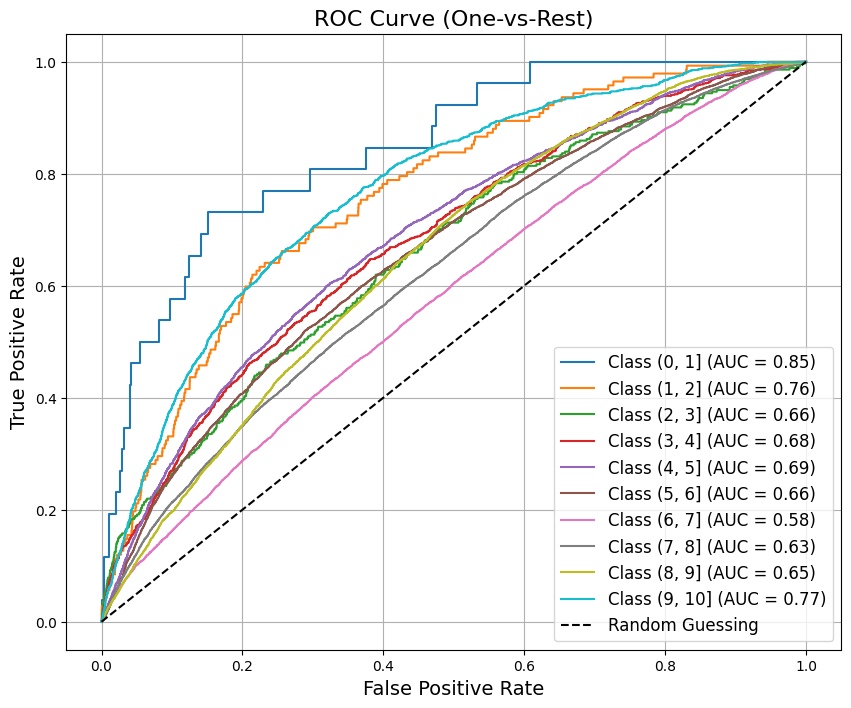

In [32]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva ROC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate", fontsize = 14)
plt.ylabel("True Positive Rate", fontsize = 14)
plt.title("ROC Curve (One-vs-Rest)", fontsize = 16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()


In [33]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_test_pred_proba, multi_class="ovr", average="macro")

np.float64(0.6926318629840233)

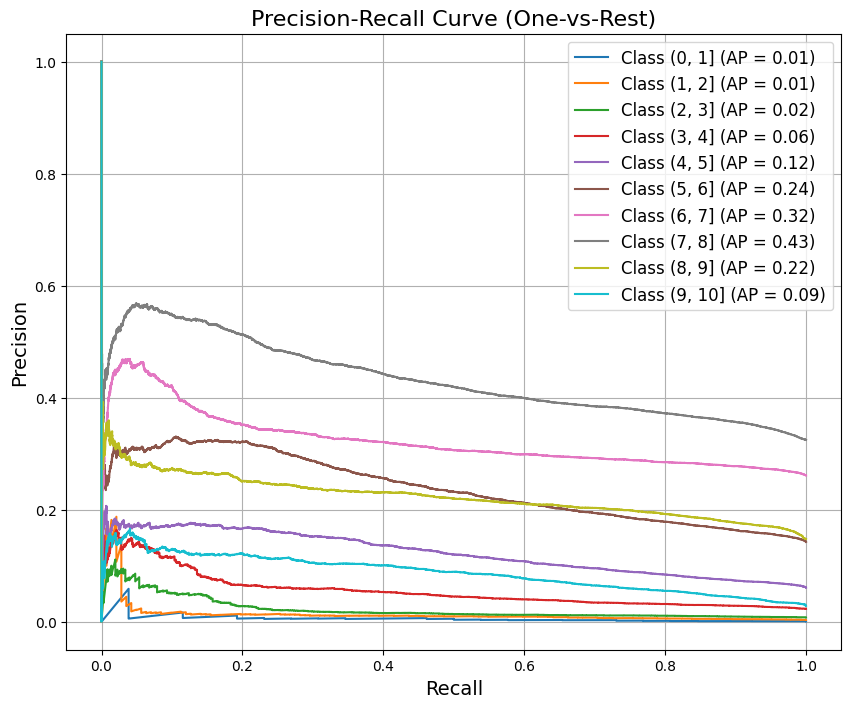

: 

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()